Numpy and Matplotlib
====================



Now that we have a basic grasp of Python, we can move to some of the most useful
packages that we will use for our data and machine learning course. These are
[NumPy](https://numpy.org), a &ldquo;number crunching&rdquo; package, and [Matplotlib](https://matplotlib.org), a package that allows
us to create plots and to visualize images. With these two packages Python can
already achieve a functionality that is similar to certain scientific
computation systems such as [Matlab](https://en.wikipedia.org/wiki/MATLAB). Indeed if any of you is already familiar with
Matlab, these examples should result quite intuitive.

### Installation
On google collab most of the content in this notebook will not need installation. If using your local Python installation install with conda by writing the following in the terminal:
```
conda install -c conda-forge numpy
conda install -c conda-forge matplotlib
conda install -c conda-forge scikit-image
```


## Numpy (number crunching)



Numpy is a numerical computation package that revolves around one important
object: an `array`. It is convenion to import numpy as follows:



In [32]:
import numpy as np

In English: &ldquo;import the `numpy` package and (for brevity) refer to it with the
identifier `np`&rdquo;.

We will refer to numpy specific objects with the `np` namespace hereafter, so
for example we will use `np.array` (internally the type of this object is
actually `np.ndarray`, but this syntax is hardly used unless we want to test the
type of an object).

Technically the `np.array` behaves similarly to a Python `list`, but
it is definitely a `list` on steroids.

Let&rsquo;s start by creating an array from a list:



In [33]:
x = np.array([0, 1, 2, 3])
print(x)

[0 1 2 3]


We can use this array object similarly to lists, so for example



In [34]:
print(len(x)) # Query its length
print(x[1:-1]) # Slice it

4
[1 2]


etc&#x2026;

Things get more interesting if we create multidimensional arrays, let&rsquo;s start by
automatically creating a **2d** array (say 5 rows, 10 columns) filled with zeros.
This can be done with



In [35]:
x = np.zeros((5, 10))
print(x)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


as you can see, the input to the function is a tuple (or a list) with the number
of elements in the array. The format for a 2d array is `(rows, columns)` so here
we have an array (filled with zeros) of 5 rows and 10 columns. Imagine this as a
list of lists, but with additional functionalities that we will see soon.

Note that we are not limited to 2d arrays, for example a R,G,B image could be
represented as a `(rows, columns, 3)` array where the last 3 dimensions each
represents a channel of the image&#x2026; more on this later when we look at
plotting.

Now if we use the `len` function on the previously created array, we will just
know the number of **rows**



In [36]:
print(len(x))

5


Again, this is like taking the `len` of a &ldquo;list of lists&rdquo;, which would simply
give us the number of lists (i.e. the number of rows in the array).

To actualy know both the number of columns we can use the `shape` property of
`np.array`:



In [37]:
rows, cols = x.shape

and to know only one or the other we could do



In [38]:
rows = x.shape[0]
cols = x.shape[1]

This can be interpreted as the rows being the &ldquo;height&rdquo; of the array and the
columns the &ldquo;width&rdquo;. But note that the order is rows first and columns after.
This has to do with how the elements of the array would ideally be stored in the
computer&rsquo;s memory.

Alternatively we can create a 1d array by passing a single number instead of a
tuple. Let&rsquo;s say we want an array with 10 times `1.0`, we can use the `np.ones`
function instead:



In [39]:
y = np.ones(10)
y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

and this has exactly the same syntax as `np.zeros`.

Another very frequently used function is `np.linspace(start, end, num)`. This
gives us an array with `num` equally spaced elements between the number `start`
and the number `end`, e.g.:



In [40]:
np.linspace(-1, 1, 9)

array([-1.  , -0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ])

and since `np.array` is iterable we can concisely write a for loop doing things
(here quite pointless) with these numbers:



In [41]:
txt = ''
for t in np.linspace(-1, 1, 9):
    txt += str(t+10) + ' '
print(txt)

9.0 9.25 9.5 9.75 10.0 10.25 10.5 10.75 11.0 


Arrays are a very convenient representation to store the vectors we have seen in
Week 3, and allow us to easily do operations on those.



#### Random number generation



Numpy also has a powerful random number generation submodule `numpy.random`.
Because we called Numpy `np` we can directly access the functionalities of this module with `np.random`.
We can for example generate arrays with uniform random numbers within a range with the `np.random.uniform(min, max)` function:



In [42]:
np.random.uniform(-100, 100)

-72.65868206300941

Or we can generate arrays by specifying the shape similarly to the `np.zeros` function, e.g.



In [43]:
np.random.uniform(-10, 10, (5, 2))

array([[ 1.50186659,  7.82643909],
       [-5.81595756, -6.29343561],
       [-7.83246219, -5.60605015],
       [ 9.57247569,  6.23366298],
       [-6.56117975,  6.32449497]])

for a 2d array, or



In [44]:
np.random.uniform(-1, 1, 10)

array([-0.45185251, -0.13659163,  0.88005964,  0.63529876, -0.3277761 ,
       -0.64917909, -0.25433591, -0.98862299, -0.49514729,  0.59132502])

for a 1d array.

If we want to always get the same random values, we can set a number as a **seed**
to the random number generator. For example, running this code multiple times
will always return the same tow random sequences:



In [45]:
np.random.seed(100)
print(np.random.uniform(-1, 1, 3))
print(np.random.uniform(-1, 1, 5))

[ 0.08680988 -0.44326123 -0.15096482]
[ 0.68955226 -0.99056229 -0.75686176  0.34149817  0.65170551]


### Indexing and slicing arrays



Numpy arrays are iterable objects and behave similarly to lists. And using the
exact syntax we used to index and slice lists will result in the same behaviour.
For instance the following will give us the first 3 rows of the array



In [46]:
x[:3]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

while this will give us the third row



In [47]:
x[2]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Things start to differ from lists if we want to access a single element:



In [48]:
x[0,2]

0.0

this could be done with the the same syntax that would work with the &ldquo;list of lists&rdquo;:



In [49]:
x[0][2]

0.0

but the former is more concise and more frequently used. We then can also use
the slicing syntax in a similar way, say to get the last three columns of the
array we can do



In [50]:
x[:,-3:]

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

where the `:` alone can be read as &ldquo;give me all the rows&rdquo;.
Now, what would you do to get only the first three rows?
Insert the code here:



To practice slicing it is useful to actually look at an image, which we will represent as a numpy array.
We will use the [Pillow](https://pypi.org/project/Pillow/) library which can be accessed with the `PIL` module. If the code below does not work install Pillow with

In [ ]:
!pip install Pillow


Now let's load the image and visualize it. We will use Matplotlib for this using `import matplotlib.pyplot as plt`. Do not worry about the details for now, just keep in mind that you can visualize a numpy array as an image using `plt.imshow(your_image)`.

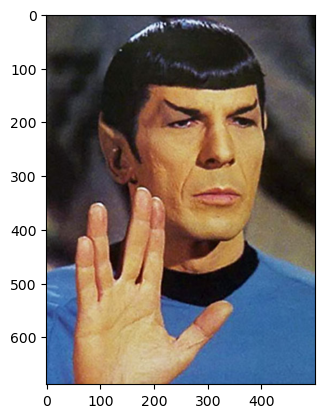

In [60]:
from PIL import Image
import matplotlib.pyplot as plt
img = np.array(Image.open('images/spock.jpg'))
plt.imshow(img)

Now let's examine the shape of the image

In [61]:
img.shape

(688, 500, 3)

That is we have 688 rows (height), 500 columns (width) and 3 channels. Let's slice this and see what happens. Experiment with the code

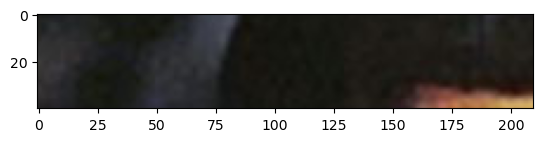

In [63]:
plt.imshow(img[100:140, 30:240, :])

Now let's look at a single channel

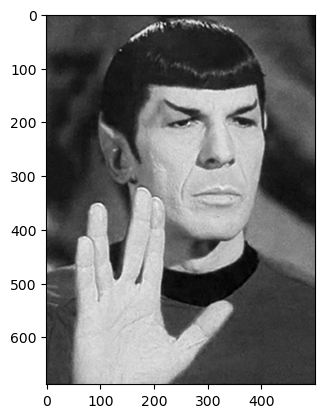

In [67]:
plt.imshow(img[:, :, 0], 'gray')

Now let's flip the image on the horizontal axis

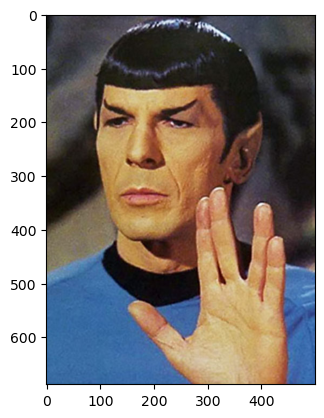

In [68]:
plt.imshow(img[:, ::-1, :])

Or the channels

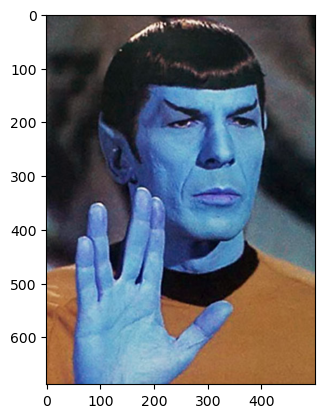

In [69]:
plt.imshow(img[:, :, ::-1])

### Adding elements, combining and &ldquo;transposing&rdquo; arrays



One downside of `np.array` with respect to a `list` is that we cannot really use
`append` to add elements dynamically. Well that is not a problem for a &ldquo;true
Pythonista&rdquo;, would probably disdain doing so. We can however use the
`np.concatenate` function to concatenate multiple arrays, or even simple Python
lists. For example, if we wanted to add a `1.0` to a 1d array of 3 zeros we
could do



In [52]:
y = np.zeros(3)
print(y)
y = np.concatenate([y, [1.0]])
print(y)

[0. 0. 0.]
[0. 0. 0. 1.]


We can concatenate any number of arrays, e.g. let&rsquo;s make an array that looks
like `[0.0, 0.0, 1.0, 1.0, 0.0, 0.0]`:



In [53]:
np.concatenate([np.zeros(2), np.ones(2), np.zeros(2)])

array([0., 0., 1., 1., 0., 0.])

Now let&rsquo;s say we want to concatenate 2d arrays or combine 1d arrays to create a
2d array. Here we can use the `np.hstack` and `np.vstack` functions, which
respectively concatenate arrays in the &ldquo;horizontal&rdquo; and &ldquo;vertical&rdquo; directions.
Observe this code:



In [54]:
np.vstack([np.ones(3), np.ones((2, 3))])

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

Note here that for NumPy, a 1d array is a &ldquo;row&rdquo; of elements (that can get a bit
ambiguous in certain cases, but we will not cover it here).

Similarly, we can stack arrays in the horizontal direction



In [55]:
A = np.hstack([np.ones((2, 1)), np.zeros((2, 2))])
A

array([[1., 0., 0.],
       [1., 0., 0.]])

These functions will only work if the size of the arrays we want to combine is
&ldquo;compatible&rdquo;, i.e. we can only stack horizontally if arrays have the same number
of rows, and we can only stack vertically if arrays have the number of columns.

Now what if I wanted to append a column to `A` with the values `[2, 3]`? Doing
this will not work because, as we previously mentioned, a &ldquo;1d array&rdquo; (a list is
equivalent to one), is considered as a row:



In [56]:
np.hstack([A, [2, 3]])

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

One can use this kind of syntax



In [ ]:
np.hstack([A, np.array([2, 3]).reshape(-1,1)])

array([[1., 0., 0., 2.],
       [1., 0., 0., 3.]])

and [others](https://stackoverflow.com/questions/5954603/transposing-a-1d-numpy-array), or use an operation known as &ldquo;transpose&rdquo;, which can be handy also in
other cases.



#### Transposing



For 2d array we can do a transpose operation, a term that comes from &ldquo;matrices&rdquo;
in linear algebra, which are also represented as 2d grids of numbers. Indeed 2d
numpy arrays are convenient representation of these mathematical objects, which
are fundamental to most machine learning techniques we will be using. We won&rsquo;t
conver these mathematical details but the interested reader can refer for
example to [https://www.statlect.com/matrix-algebra/>](https://www.statlect.com/matrix-algebra/>)for a primer.

Anyhow, transposing an array simply means &ldquo;transforming&rdquo; it so rows become
columns and columns become rows. Say we create an array as follows:



In [ ]:
B = np.vstack([np.linspace(0, 4, 5),
               np.linspace(1, 5, 5)])
B

array([[0., 1., 2., 3., 4.],
       [1., 2., 3., 4., 5.]])

The transpose is given by the &ldquo;property&rdquo; `.T` as follows:



In [ ]:
B.T

array([[0., 1.],
       [1., 2.],
       [2., 3.],
       [3., 4.],
       [4., 5.]])

Now to add a coumn to the previous `A` array, we could do:



In [ ]:
np.vstack([A.T, [2, 3]]).T

array([[1., 0., 0., 2.],
       [1., 0., 0., 3.]])

### Reshaping arrays
In machine learning applications we will often encounter cases where we need to reshape a numpy array so it is compatible with the inputs of a given machine learning model.
For example, we will see image-based models that are trained on batches of multiple RGB images with shape `(height, width, 3)`, which are stored as a single array with shape `(number_of_images, height, width, 3)`. If we want to use such a model with a single image, we need to reshape an array by adding a dummy dimension. This can be done with the `np.expand_dims` function or the `reshape` method of the array itself. As long as we add *one* dimension, the order of the data in the array will remain unchanged.
So for example given an array:

In [ ]:
img = np.zeros((600, 800, 3))
print(img.shape)

(600, 800, 3)


We can equivalently do:

In [ ]:
img2 = img.reshape((1, 600, 800, 3))
print(img2.shape)

(1, 600, 800, 3)


Or

In [ ]:
img2 = np.expand_dims(img, 0)
print(img2.shape)

(1, 600, 800, 3)


In another instance we will see grayscale images that are loaded as arrays of shape `(height, width)`. In this case we will need to add two dummy dimension, one at the beginning and one at the end resulting in a shape of `(number_of_images, height, width, 1)`. This stands for "one image of width, height with one channel". Again since we add single dimensions we are effectively not modifying the number of elements in the array. So in this instance, given an image

In [ ]:
img = np.zeros((600, 800))
img.shape

(600, 800)

We would do:

In [ ]:
img2 = img.reshape((1, 600, 800, 1))
img2.shape

(1, 600, 800, 1)

### Mathematical operations on arrays



Ok, now to some more &ldquo;meaty&rdquo; things we can do with arrays. Differntly from
lists, we can do operations with arrays such as multiplication, addition etc..etc&#x2026;

Multiplying/dividing/adding/subtracting/raising-to-a-power with a single number,
applies the operation to all elements in an array. So now, finally, we can make
an array all of 9&rsquo;s!



In [ ]:
np.ones((5,3))*9

array([[9., 9., 9.],
       [9., 9., 9.],
       [9., 9., 9.],
       [9., 9., 9.],
       [9., 9., 9.]])

As a small exercise, try creating the same array with addition.

We can also apply other operations in &ldquo;batch&rdquo; form for example let&rsquo;s take the square root of
a sequence of numbers:



In [ ]:
np.sqrt(np.linspace(0, 7, 3))

array([0.        , 1.87082869, 2.64575131])

See [https://numpy.org/doc/stable/reference/routines.math.html>](https://numpy.org/doc/stable/reference/routines.math.html>)for a list of
available operations.

As another example we can very rapidly get the values of a
cosine wave with an expression such as



In [ ]:
np.cos(np.linspace(0, np.pi*2, 20))

array([ 1.        ,  0.94581724,  0.78914051,  0.54694816,  0.24548549,
       -0.08257935, -0.40169542, -0.67728157, -0.87947375, -0.9863613 ,
       -0.9863613 , -0.87947375, -0.67728157, -0.40169542, -0.08257935,
        0.24548549,  0.54694816,  0.78914051,  0.94581724,  1.        ])

&#x2026;we will plot this one soon.

As long as two arrays have the same dimension, we can also
multiply/add/subtract/divide **between them**, e.g:



In [ ]:
np.linspace(0, 1, 5) + np.linspace(-2, -1, 5)

array([-2. , -1.5, -1. , -0.5,  0. ])

Or



In [ ]:
np.array([[1, 2, 3],
          [4, 2, 4],
          [3, 3, 5]])*np.eye(3)

array([[1., 0., 0.],
       [0., 2., 0.],
       [0., 0., 5.]])

where `np.eye(num)` gives us a square array with `num` columns and ones along
the diagonal. Again these operations are element-wise and require the arrays to
have exactly the same shape. When dealing with with 2d arrays, this form of
multiplication is &ldquo;unusual&rdquo; as typically 2d array represent matrices and
multiplication between matrices is not element-wise and obeys specific rules and
restrictions (it is fundamental to artificial neural networks). If you want to
sound sophisticated with nerd friends, this element-wise form of multiplication
has a special name, it is called the [&ldquo;Hadamard product&rdquo;](https://en.wikipedia.org/wiki/Hadamard_product_(matrices)) (say it with a serious
face while stroking your chin), which also shows how math sometimes sounds
scarier than what it actually is.



### More operations on arrays



Numpy provides some useful functions to examine and manipulate arrays. The
`np.max` and `np.min` functions give us the maximum and minimum value of an
array (or even a list). For example



In [ ]:
z = np.random.uniform(-10, 10, 10) # generate an array with 10 random values between -10 and 10
print(z)
print('Maximum is: ' + str(np.max(z)))

[-9.75360749  2.69934139 -0.39686321  6.14409061  5.63628375  6.56423927
 -5.64934612 -4.0657847   8.14994725  1.35649271]
Maximum is: 8.149947247508065

This could be used for example to normalize the array



In [ ]:
(z - np.min(z)) / (np.max(z) - np.min(z))

array([0.        , 0.69555734, 0.52261936, 0.88796322, 0.85959975,
       0.91143055, 0.22924282, 0.31769237, 1.        , 0.62055275])

Another couple of particularly useful functions ar `np.argmin` and `np.argmax`. These give us **the index** of the minimum and maximum value in an array (or a list).
One example use of these functions is in a classification setting. Say our classifier gives us a series of probabilities for given classes. We can concisely find the maximum class (as an index) with



In [ ]:
p = [0.3, 0.5, 0.1, 0.1]
print(p)
print("Maximum is " + str(np.argmax(p)))

[0.3, 0.5, 0.1, 0.1]
Maximum is 1

Note that here we used a simple list and not an array.

One more useful function is `np.sum`. It  sums all the values in an array and returns the result.
E.g.



In [ ]:
z = np.linspace(0, 5, 4)
print(z)
print(np.sum(z))

[0.         1.66666667 3.33333333 5.        ]
10.0

For multi-dimensional arrays it is possible to also sum along rows, or columns, etc.., by specifying the `axis` optional argument:



In [ ]:
z = np.ones((3, 4))
print(z)
print(np.sum(z, axis=0)) # sum along columns
print(np.sum(z, axis=1)) # sum along rows

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
[3. 3. 3. 3.]
[4. 4. 4.]

In this case the result is an array and not a number. The same &ldquo;axis&rdquo; trick also holds for `np.min` and `np.max` and many other functions.



## Matplotlib (plotting)



With some NumPy tools in place, let&rsquo;s dive into creating some images. One of the
most widely used tools for this taks in Python is a package called [Matplotlib](https://matplotlib.org).
This is a large and sometimes difficult to grasp (well) visualization framework,
that is inspired to the plotting capabilities of Matlab. The typical way to
import matplotlib is the following:



In [ ]:
import matplotlib.pyplot as plt

In English: &ldquo;import the `pyplot` module from the `matplotlib` package and refer to it
with the identifier `plt`&rdquo;.

As a basic example let&rsquo;s plot `100` samples from a sine wave:



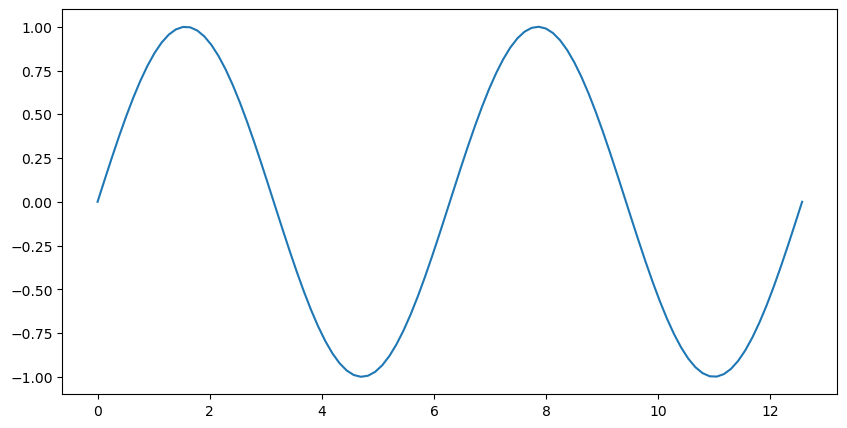

In [ ]:
x = np.linspace(0, np.pi*4, 100)
y = np.sin(x)

plt.figure(figsize=(10, 5))
plt.plot(x, y)
plt.show()

Now let&rsquo;s walk through the code. The first two lines use the methods we have
seen in the earlier section to generate an array of values and to then compute
the value of the `sin` function for each of these values.

In the rest of the code, first we create a new &ldquo;figure&rdquo; with the `plt.figure`
function. Here we can see a very common Python construct we have not encountered
before: a named optional argument. **In Python we can define functions with
arguments that have a default value, and then set these arguments in an
arbitrary order by explicitly naming them**. So here for example, we decide to
specify the size of the image, which is sepecified with the argument `figsize`
and a tuple `(width, height)`. This parameter is optional, so try to remove it
and see what happens.

From now on, all our plotting commands will end up in the current &ldquo;figure&rdquo;. The
next line is the `plt.plot` function that takes a series of `x` coordinates and
a corresponding series of `y` coordinates.

Finally, the `plt.show()` function displays our result.



### Combining multiple plots into one



Now say we want to show a sine and a cosine wave in the same plot:



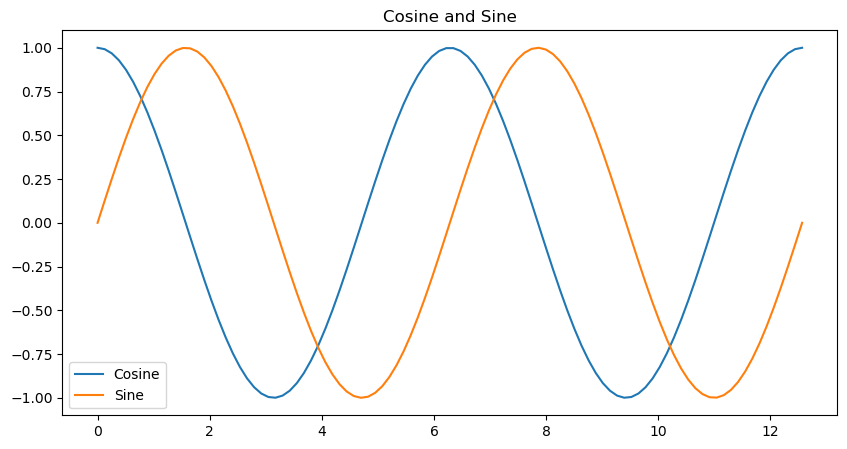

In [ ]:
plt.figure(figsize=(10, 5))
plt.title("Cosine and Sine")
plt.plot(x, np.cos(x), label='Cosine')
plt.plot(x, np.sin(x), label='Sine')
plt.legend()
plt.savefig('myplot.pdf')
plt.show()

Here you can see that after specifying the &ldquo;figure&rdquo; the following `plt.plot`
commands adds curves to the same figure. Anything we do between `plt.figure` and
`plt.show` will be added to the given figure. So in this example, we have added a title with the
`plt.title` function, and we have specified labels for our curves with the
`label` optional argument. Finally we visualize the legend with `plt.legend()`.
In this example we also save the figure as a pdf. This can be easily done with
the `plt.savefig` function. Note that this function should be called as the last
thing before `plt.show()`.

In the example above, Matplotlib automatically sets colors for us. However, we
can explitly set the colors, and many other parameters. See [the function&rsquo;s
documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) for examples and more info.

The important thing to grasp here is that Matplotlib works in a &ldquo;stateful&rdquo;
manner. We crate a figure and then incrementally add things to it and change
it&rsquo;s state (e.g. adding a title, a legend) and finally viusalize it when we
finished our specification.



### Subplots



It is often useful to place multiple plots into the same figure. This can be
easily done with Matplotlib. Say we want to draw the sine and cosine waves into
two different plots. One method to do this could be:



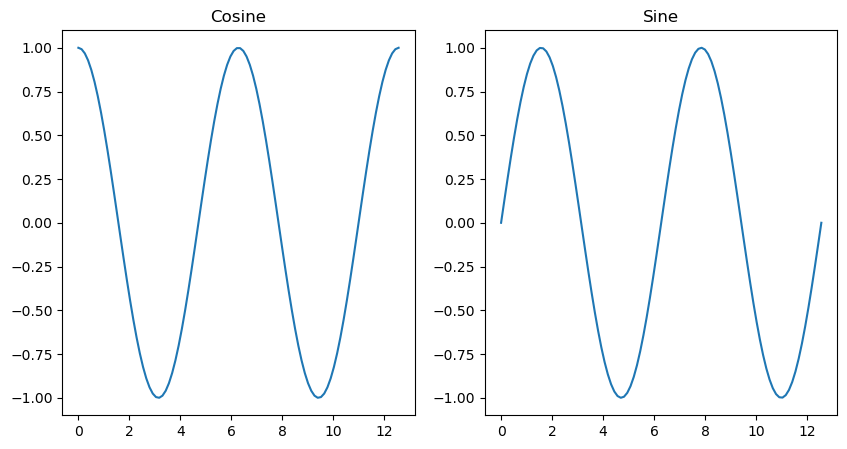

In [ ]:
plt.figure(figsize=(10, 5))
ax = plt.subplot(1, 2, 1)
plt.title("Cosine")
plt.plot(x, np.cos(x))
ax = plt.subplot(1, 2, 2)
plt.title("Sine")
plt.plot(x, np.sin(x))
plt.show()

The key here is the `plt.subplot(num_rows, num_cols, index)`, which tells
Matplotlib that our current drawing commands will go into a &ldquo;subplot&rdquo; within a
`num_rows * num_cols` grid and in the cell with a given `index`. The index
starts from the top left cell and continues along each row. So say we had a 2x2
grid, the index to draw into the first cell of the second row would be `3`.

Here, you will notice that we store the result of the `plt.subplot` function.
This gives us an `Axes` object, which refers to the current sub-plot and is
useful to set its properties.



### Loading and showing images



To load an image, we will use a new package, [Scikit Image](https://scikit-image.org) or `skimage` for
short. We will use the `io` module of `skimage` and import it with



In [ ]:
from skimage import io

Note that we don&rsquo;t use `as` here since the module name is conveniently short.
We can load and show the image with:



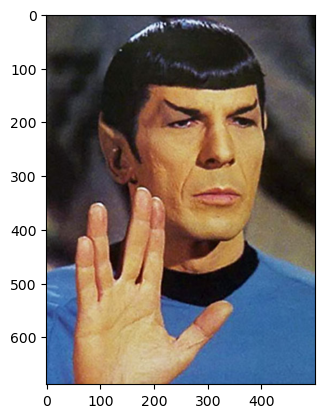

In [ ]:
img = io.imread('./images/spock.jpg')
plt.figure()
plt.imshow(img)
plt.show()

The image is actually a 3d `np.array` with shape



In [ ]:
img.shape

| 688 | 500 | 3 |

with the difference that our image is stored as `uint8` (8 bit integers going from 0 to 255).
This means that the array has a lower available precision than the floating point arrays we were seeing earlier.

We can query the &ldquo;type&rdquo; of an array with the `dtype` property:



In [ ]:
img.dtype

dtype('uint8')

This is a subtlety that we will have do deal with especially when working with images.

We can still do slicing etc for example this will show a detail of only one channel of the image:



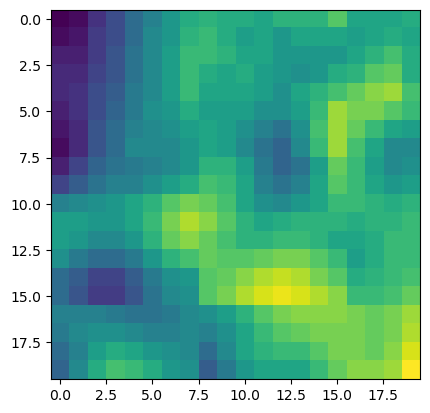

In [ ]:
plt.figure()
plt.imshow(img[:20, :20, 2], interpolation='nearest')
plt.show()

Note that we use an optional parameter `interpolation='nearest'`. This indicates
that we do not want to filter the image when scaling it and it results in the
pixels being shown as distinct squares.



#### Filtering



The `skimage` package also provides us with functionality for [filtering](https://scikit-image.org/docs/stable/api/skimage.filters.html#gaussian) (and [many more](https://scikit-image.org/docs/stable/api/api.html)!), e.g.



/Users/colormotor/opt/miniconda3/lib/python3.10/site-packages/skimage/_shared/utils.py:348: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  return func(*args, **kwargs)

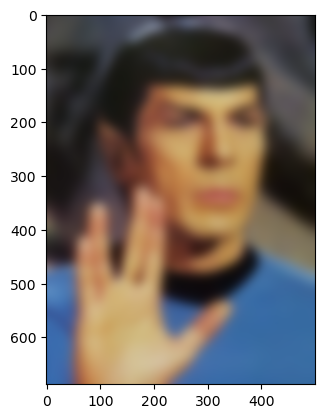

In [ ]:
from skimage import filters
filtered_img = filters.gaussian(img, 10)
plt.imshow(filtered_img)
plt.show()

will blur the image with a Gaussian filter.

However, now note that after filtering the format and the range of our pixels has changed:



In [ ]:
print('Type: ' + str(filtered_img.dtype) + ', max: ' + str(np.max(filtered_img)))

Type: float64, max: 0.833781009100106

#### Type conversion



Now to the issue with array types. The blur filter gave us back an image stored
as floating point pixels in the range `[0, 1]`. However, for some operations to work
(e.g. the ones we will see next) we need an image stored with the `np.uint8` dtype.
We can convert back to 8 bit integers by using the `.astype()` function



In [ ]:
filtered_img = (filtered_img*255).astype(np.uint8)

This multiplies the input by `255`, going from the `[0,1]` range to the `[0, 255]` range, and then converts the type to `np.uint8`.



## A simple face detection example



Let&rsquo;s finally look at a simple face landmark detection example in Python. We will use the [mlxtend](http://rasbt.github.io/mlxtend/) package, which gives a simple interface to a number of machine learning algorithms and utilities. Under the hood, this example uses a face detector from the [dlib](http://dlib.net) library.
First let&rsquo;s make sure we have `mlxtend` installed by using the relevant [conda](https://anaconda.org/conda-forge/mlxtend) package:

    conda install -c conda-forge dlib
    conda install -c conda-forge mlxtend

We can then import the face detection utility:

Or **if you are working in google collab**:

In [ ]:
!pip install mlxtend

In [ ]:
from mlxtend.image import extract_face_landmarks

Finding the face landmarks is just one line of code:



In [ ]:
landmarks = extract_face_landmarks(filtered_img)
print(landmarks)

#+begin_example
[[154 211]
 [157 248]
 [165 286]
 [176 321]
 [194 353]
 [217 382]
 [247 404]
 [281 418]
 [317 421]
 [347 414]
 [367 392]
 [380 362]
 [387 330]
 [393 298]
 [400 268]
 [404 238]
 [402 208]
 [204 179]
 [227 169]
 [251 167]
 [275 171]
 [297 180]
 [340 180]
 [355 172]
 [371 167]
 [388 166]
 [400 174]
 [321 198]
 [324 218]
 [328 239]
 [333 260]
 [302 285]
 [314 287]
 [326 289]
 [335 287]
 [344 283]
 [235 201]
 [250 193]
 [266 192]
 [278 202]
 [265 207]
 [249 207]
 [343 202]
 [356 192]
 [371 192]
 [380 200]
 [372 207]
 [357 206]
 [278 344]
 [297 333]
 [315 326]
 [325 329]
 [334 326]
 [343 331]
 [350 341]
 [343 349]
 [335 353]
 [325 355]
 [315 355]
 [297 352]
 [287 344]
 [315 340]
 [324 341]
 [334 339]
 [343 341]
 [334 335]
 [325 338]
 [316 337]]
#+end_example

We can now plot the landmarks



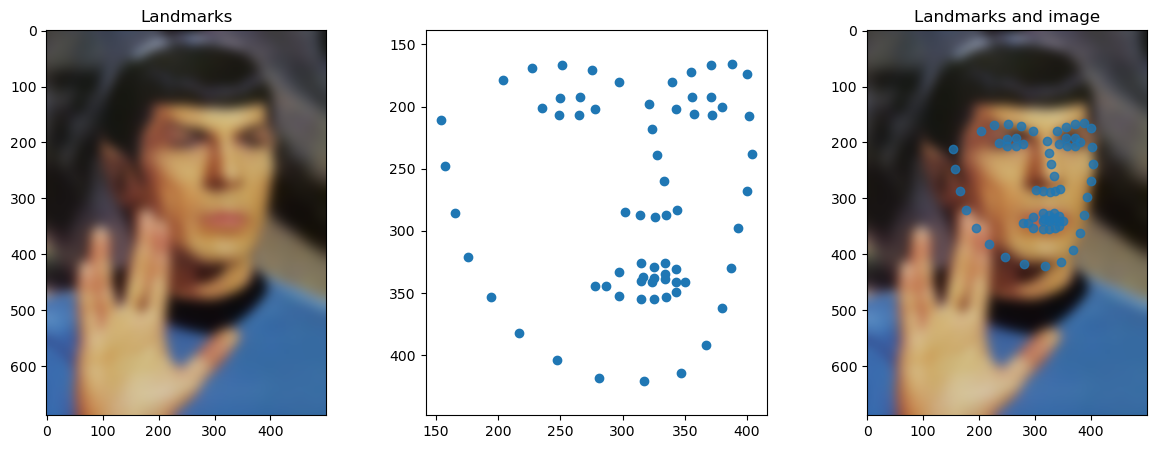

In [ ]:
plt.figure(figsize=(15, 5))
ax = plt.subplot(1, 3, 1)
plt.title("Input image")
plt.imshow(filtered_img)

plt.title("Landmarks")
ax = plt.subplot(1, 3, 2)
plt.scatter(landmarks[:, 0], landmarks[:, 1])
ax.invert_yaxis()
plt.axis('equal')

plt.subplot(1, 3, 3)
plt.title("Landmarks and image")
plt.imshow(filtered_img)
plt.scatter(landmarks[:, 0], landmarks[:, 1], alpha=0.8)
plt.show()

This code has three new Matplotlib functions we have not seen earlier. The `plt.scatter` functions creates what is known as a &ldquo;scatterplot&rdquo;, essentially it will just plot a circle for each point in the input. This is followed by a `ax.invert_yaxis()` function that flips the vertical axis so increasing coordinates go towards the bottom (the same convention used in P5js). Finally we use `ax.axis('equal')` to tell Matplotlib that we want it to maintain a fixed 1:1 aspect ratio for the plot. Try to comment these last two lines and see how the plot changes.

